# Modified Hebb-Williams Maze Task

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [166]:
hwk_file = pd.read_csv('/Users/labc02/Documents/PDCB_data/Behavior/HWK_complete.csv')

In [167]:
hwk_test = hwk_file[hwk_file['Task_Phase'].str.contains('Testing')]

In [168]:
gp_ser = [ii.split('_')[0] for ii in hwk_test['ID']]

In [169]:
hwk_test['Group'] = gp_ser

<ipython-input-169-31bb6c2e9d67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hwk_test['Group'] = gp_ser


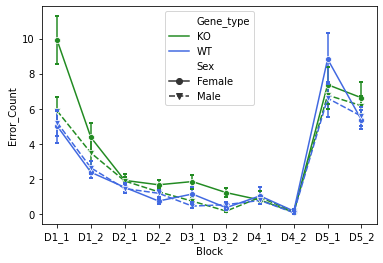

In [171]:
sns.lineplot(x='Block', y='Error_Count', hue='Gene_type', data=hwk_test, estimator='mean', ci=68, style='Sex', palette=['forestgreen', 'royalblue'], markers=['o', 'v', 'o', 'v'], err_style = 'bars', err_kws={'capsize':2, 'capthick':2})


In [172]:
pg.mixed_anova(data=hwk_test, dv='Error_Count', within='Block', subject='ID', between='Group')

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,47.421190,3,34,15.807063,3.127100,3.838425e-02,NaN,0.216252,NaN,NaN,NaN,NaN
1,Block,1764.454613,9,306,196.050513,105.605818,2.127652e-88,1.481254e-25,0.756457,0.297655,False,0.000127,1.490864e-14
2,Interaction,214.308690,27,306,7.937359,4.275588,1.294302e-10,NaN,0.273920,NaN,NaN,NaN,NaN


In [173]:
pg.pairwise_ttests(data=hwk_test, dv='Error_Count', within='Block', between='Group', subject='ID')

ValueError: Repeated measures dataframe is not balanced. `Subjects` must have the same number of elements in all conditions, even when missing values are present.

In [174]:
idx_drop = hwk_test[(hwk_test['Task_Phase']=='Testing_4') | (hwk_test['Task_Phase']=='Testing_5')].index

In [175]:
hwk_class = hwk_test.drop(idx_drop)

Text(15, 200, '*')

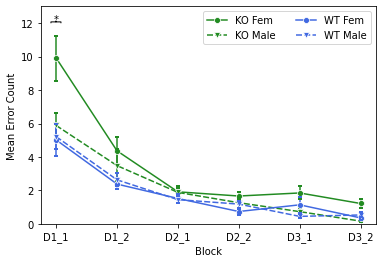

In [256]:
err_fig = plt.figure()
err_ax =plt.subplot()
sns.lineplot(x='Block', y='Error_Count', hue='Gene_type', data=hwk_class, estimator='mean', ci=68, style='Sex', palette=['forestgreen', 'royalblue'], markers=['o', 'v', 'o', 'v'], err_style = 'bars', err_kws={'capsize':2, 'capthick':2}, ax = err_ax)
err_ax.set_ylabel('Mean Error Count')
err_ax.legend(ncol=2, labels=['KO Fem', 'KO Male', 'WT Fem','WT Male'])
err_ax.set_ylim(0,13)
err_ax.annotate('*', xy=(15, 200), xytext=(15, 200), xycoords='axes points', ha='center',
                va='bottom', arrowprops=dict(arrowstyle='-[, widthB=0.5, lengthB=.1', lw=1, color='k'))


In [258]:
err_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/error_fig_all_groups.png', dpi=600)

In [177]:
pg.normality(data=hwk_class, dv='Error_Count', group='Group', method='normaltest')

,W,pval,normal
KOF,298.810496,1.300545e-65,False
KOM,420.813529,4.183148e-92,False
WTF,329.330360,3.067757e-72,False
WTM,321.408495,1.610765e-70,False


In [72]:
pg.homoscedasticity(data=hwk_class, dv='Error Count', group='Group')

,W,pval,equal_var
levene,6.886568,0.000133,False


### No normality, no equal variances, no sphericity

In [50]:
pg.mixed_anova(data=hwk_class, dv='Error Count', within='Block', between='Group', subject='ID')

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,121.785644,3,42,40.595215,8.203751,2.063985e-04,NaN,0.369476,NaN,NaN,NaN,NaN
1,Block,1158.004529,5,210,231.600906,85.438940,1.103702e-48,1.460330e-22,0.670430,0.458272,False,0.050354,1.399116e-20
2,Interaction,119.372943,15,210,7.958196,2.935826,2.993289e-04,NaN,0.173350,NaN,NaN,NaN,NaN


In [53]:
pg.pairwise_ttests(data=hwk_class, dv='Error Count', between='Group', within='Block', subject='ID', padjust='holm')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/parametric.py:197: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/effsize.py:689: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to "


,Contrast,Block,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Block,-,D1_1,D1_2,True,True,5.536379,229.000000,two-sided,8.430706e-08,6.744565e-07,holm,1.102e+05,0.487832
1,Block,-,D1_1,D2_1,True,True,9.005625,229.000000,two-sided,8.543467e-17,1.025216e-15,holm,6.066e+13,0.838316
2,Block,-,D1_1,D2_2,True,True,10.046521,229.000000,two-sided,6.547180e-20,8.511334e-19,holm,6.878e+16,0.924677
3,Block,-,D1_1,D3_1,True,True,10.137141,229.000000,two-sided,3.455563e-20,4.837788e-19,holm,1.288e+17,0.941419
4,Block,-,D1_1,D3_2,True,True,11.314237,241.889277,two-sided,4.229028e-24,6.343542e-23,holm,1.195e+23,1.052300
5,Block,-,D1_2,D2_1,True,True,4.315756,229.000000,two-sided,2.367438e-05,1.244760e-04,holm,513.133,0.375319
6,Block,-,D1_2,D2_2,True,True,5.334806,229.000000,two-sided,2.294278e-07,1.605995e-06,holm,4.22e+04,0.494537
7,Block,-,D1_2,D3_1,True,True,5.623647,229.000000,two-sided,5.421168e-08,4.879051e-07,holm,1.684e+05,0.523566
8,Block,-,D1_2,D3_2,True,True,7.248734,256.320921,two-sided,4.952867e-12,5.448154e-11,holm,3.694e+09,0.674267
9,Block,-,D2_1,D2_2,True,True,2.844120,229.000000,two-sided,4.856422e-03,1.456927e-02,holm,3.743,0.230373


### Collapsing Sex, only genotype

Text(0, 0.5, 'Mean Error Count')

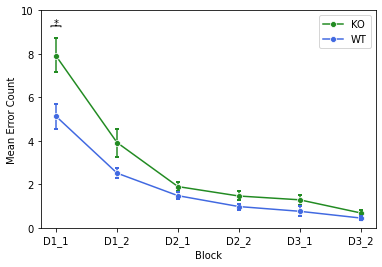

In [262]:
err_fig_2 = plt.figure()
err_ax2 = plt.subplot()
sns.lineplot(x='Block', y='Error_Count', hue='Gene_type', data=hwk_class, estimator='mean', ci=68, palette=['forestgreen', 'royalblue'], style='Gene_type', dashes=False, markers=['o', 'o'], err_style = 'bars', err_kws={'capsize':2, 'capthick':2}, ax = err_ax2)
err_ax2.set_ylim(0, 10)
err_ax2.annotate('*', xy=(15, 200), xytext=(15, 200), xycoords='axes points', ha='center',
                va='bottom', arrowprops=dict(arrowstyle='-[, widthB=0.5, lengthB=.1', lw=1, color='k'))
err_ax2.legend(ncol=1, labels=['KO', 'WT'])
err_ax2.set_ylabel('Mean Error Count')

In [263]:
err_fig_2.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/error_fig_two_groups.png', dpi=600)

In [214]:
pg.mixed_anova(data=hwk_class, dv='Error_Count', within='Block', subject='ID', between='Gene_type')

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Gene_type,65.325079,1,44,65.325079,10.875476,1.934352e-03,NaN,0.198185,NaN,NaN,NaN,NaN
1,Block,1158.004529,5,220,231.600906,80.308232,1.120003e-47,1.460330e-22,0.646041,0.458272,False,0.050354,1.399116e-20
2,Interaction,54.165818,5,220,10.833164,3.756428,2.770046e-03,NaN,0.078658,NaN,NaN,NaN,NaN


In [217]:
pg.pairwise_ttests(data=hwk_class, dv='Error_Count', between='Gene_type', within='Block', subject='ID', padjust='holm')


/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/parametric.py:197: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/effsize.py:689: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to "


,Contrast,Block,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Block,-,D1_1,D1_2,True,True,5.536379,229.000000,two-sided,8.430706e-08,6.744565e-07,holm,1.102e+05,0.487832
1,Block,-,D1_1,D2_1,True,True,9.005625,229.000000,two-sided,8.543467e-17,1.025216e-15,holm,6.066e+13,0.838316
2,Block,-,D1_1,D2_2,True,True,10.046521,229.000000,two-sided,6.547180e-20,8.511334e-19,holm,6.878e+16,0.924677
3,Block,-,D1_1,D3_1,True,True,10.137141,229.000000,two-sided,3.455563e-20,4.837788e-19,holm,1.288e+17,0.941419
4,Block,-,D1_1,D3_2,True,True,11.314237,241.889277,two-sided,4.229028e-24,6.343542e-23,holm,1.195e+23,1.052300
5,Block,-,D1_2,D2_1,True,True,4.315756,229.000000,two-sided,2.367438e-05,1.244760e-04,holm,513.133,0.375319
6,Block,-,D1_2,D2_2,True,True,5.334806,229.000000,two-sided,2.294278e-07,1.605995e-06,holm,4.22e+04,0.494537
7,Block,-,D1_2,D3_1,True,True,5.623647,229.000000,two-sided,5.421168e-08,4.879051e-07,holm,1.684e+05,0.523566
8,Block,-,D1_2,D3_2,True,True,7.248734,256.320921,two-sided,4.952867e-12,5.448154e-11,holm,3.694e+09,0.674267
9,Block,-,D2_1,D2_2,True,True,2.844120,229.000000,two-sided,4.856422e-03,1.456927e-02,holm,3.743,0.230373


In [89]:
hw_idx = hwk_class.groupby(['Gene_type', 'Sex', 'ID', 'Block'])['Error Count'].mean()

In [91]:
hw_idx = hw_idx.reset_index()

In [92]:
hw_idx

,Gene_type,Sex,ID,Block,Error Count
0,KO,Female,KOF_0,D1_1,10.0
1,KO,Female,KOF_0,D1_2,1.8
2,KO,Female,KOF_0,D2_1,1.2
3,KO,Female,KOF_0,D2_2,0.4
4,KO,Female,KOF_0,D3_1,0.2
...,...,...,...,...,...
271,WT,Male,WTM_9,D1_2,1.8
272,WT,Male,WTM_9,D2_1,2.0
273,WT,Male,WTM_9,D2_2,1.0
274,WT,Male,WTM_9,D3_1,0.6


In [271]:
HW_idx = {'Genotype':[], 'Group':[], 'Sex':[], 'ID':[], 'Enc_idx':[], 'Ret_idx':[]}

In [272]:
for sub in hw_idx['ID'].unique():
    HW_idx['ID'].append(sub)
    HW_idx['Genotype'].append(hw_idx['Gene_type'][hw_idx['ID']==sub].unique().item())
    HW_idx['Group'].append(sub.split('_')[0])
    HW_idx['Sex'].append(hw_idx['Sex'][hw_idx['ID']==sub].unique().item())
    
    temp_d1_1 = hw_idx['Error Count'][(hw_idx['ID']==sub)&(hw_idx['Block']=='D1_1')].item()
    temp_d1_2 = hw_idx['Error Count'][(hw_idx['ID']==sub)&(hw_idx['Block']=='D1_2')].item()
    temp_d2_1 = hw_idx['Error Count'][(hw_idx['ID']==sub)&(hw_idx['Block']=='D2_1')].item()
    temp_d2_2 = hw_idx['Error Count'][(hw_idx['ID']==sub)&(hw_idx['Block']=='D2_2')].item()
    temp_d3_1 = hw_idx['Error Count'][(hw_idx['ID']==sub)&(hw_idx['Block']=='D3_1')].item()
    temp_d3_2 = hw_idx['Error Count'][(hw_idx['ID']==sub)&(hw_idx['Block']=='D3_2')].item()
    
    try:
        temp_enc =  ((1-temp_d1_2/temp_d1_1)+(1-temp_d2_2/temp_d2_1))/2
        HW_idx['Enc_idx'].append(temp_enc)
    except ZeroDivisionError:
        HW_idx['Enc_idx'].append(0)
    try:
        temp_ret =  ((1-temp_d2_1/temp_d1_2)+(1-temp_d3_1/temp_d2_2))/2
        HW_idx['Ret_idx'].append(temp_ret)
    except ZeroDivisionError:
        HW_idx['Ret_idx'].append(0)

In [273]:
K_df = pd.DataFrame(HW_idx)

In [276]:
pg.normality(K_df, dv='Enc_idx', group='Group', method='normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,W,pval,normal
KOF,16.208826,0.000302,False
KOM,1.697494,0.427951,True
WTF,3.178993,0.204028,True
WTM,5.729847,0.056988,True


In [277]:
pg.homoscedasticity(K_df, dv='Enc_idx', group='Group')

,W,pval,equal_var
levene,0.509222,0.678082,True


In [284]:
pg.anova(K_df, dv='Enc_idx', between=['Genotype', 'Sex'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,0.001743,1.0,0.001743,0.004462,0.947058,0.000106
1,Sex,0.370741,1.0,0.370741,0.949043,0.335541,0.022097
2,Genotype * Sex,0.018923,1.0,0.018923,0.048441,0.826865,0.001152
3,Residual,16.407200,42.0,0.390648,NaN,NaN,NaN


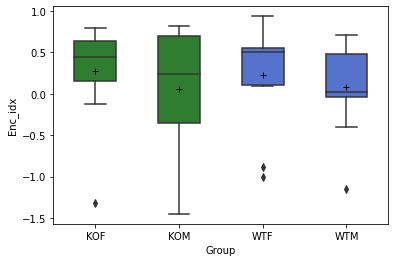

In [285]:
sns.boxplot(data=K_df, x='Group', y='Enc_idx', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.5, palette=['forestgreen', 'forestgreen', 'royalblue', 'royalblue'])


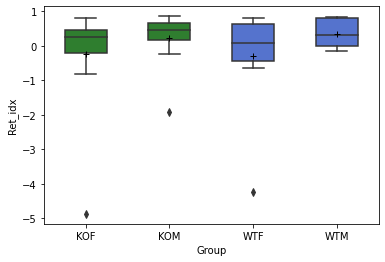

In [286]:
sns.boxplot(data=K_df, x='Group', y='Ret_idx', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.5, palette=['forestgreen', 'forestgreen', 'royalblue', 'royalblue'])


In [191]:
pg.normality(data=hwk_class[hwk_class['Block']=='D1_1'], dv='Error_Count', group='Group')

,W,pval,normal
KOF,0.793445,9.302531e-08,False
KOM,0.769179,2.487877e-08,False
WTF,0.681110,3.850563e-09,False
WTM,0.731724,3.817973e-09,False


In [192]:
pg.normality(data=hwk_class[hwk_class['Block']=='D1_1'], dv='Error_Count', method='normaltest', group='Group')

,W,pval,normal
KOF,21.862476,1.789055e-05,False
KOM,20.969425,2.796065e-05,False
WTF,48.076913,3.632712e-11,False
WTM,40.457561,1.639654e-09,False


In [193]:
pg.kruskal(data=hwk_class[hwk_class['Block']=='D1_1'], dv='Error_Count', between='Group')

,Source,ddof1,H,p-unc
Kruskal,Group,3,7.112254,0.068405


In [196]:
pg.anova(data=hwk_class[hwk_class['Block']=='D1_1'], dv='Error_Count', between=['Sex', 'Gene_type'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,233.475325,1.0,233.475325,3.919021,0.048956,0.017045
1,Gene_type,411.648052,1.0,411.648052,6.909755,0.009161,0.029667
2,Sex * Gene_type,255.612857,1.0,255.612857,4.290612,0.039459,0.018631
3,Residual,13463.930000,226.0,59.574912,NaN,NaN,NaN


In [197]:
pg.pairwise_tukey(data=hwk_class[hwk_class['Block']=='D1_1'], dv='Error_Count', between='Group')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KOF,KOM,9.916667,5.883333,4.033333,1.409195,two-sided,2.862154,0.022343,0.519227
1,KOF,WTF,9.916667,5.020000,4.896667,1.477976,two-sided,3.313089,0.005285,0.629992
2,KOF,WTM,9.916667,5.216667,4.700000,1.409195,two-sided,3.335238,0.004896,0.605050
3,KOM,WTF,5.883333,5.020000,0.863333,1.477976,two-sided,0.584132,0.900000,0.111074
4,KOM,WTM,5.883333,5.216667,0.666667,1.409195,two-sided,0.473083,0.900000,0.085823
5,WTF,WTM,5.020000,5.216667,-0.196667,1.477976,two-sided,-0.133065,0.900000,-0.025303


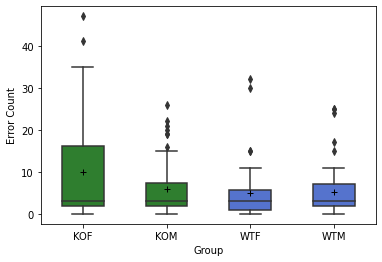

In [138]:
sns.boxplot(data= hwk_class[hwk_class['Block']=='D1_1'], x='Group', y='Error Count', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.5, palette=['forestgreen', 'forestgreen', 'royalblue', 'royalblue'])


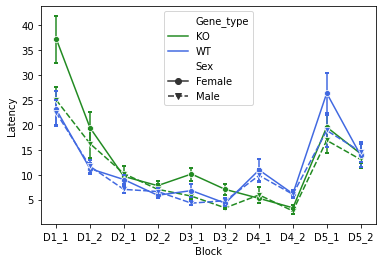

In [198]:
sns.lineplot(x='Block', y='Latency', hue='Gene_type', data=hwk_test, estimator='mean', ci=68, style='Sex', palette=['forestgreen', 'royalblue'], markers=['o', 'v', 'o', 'v'], err_style = 'bars', err_kws={'capsize':2, 'capthick':2})


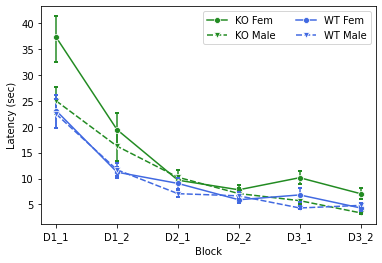

In [288]:
lat_fig = plt.figure()
lat_ax= plt.subplot()
sns.lineplot(x='Block', y='Latency', hue='Gene_type', data=hwk_class, estimator='mean', ci=68, style='Sex', palette=['forestgreen', 'royalblue'], markers=['o', 'v', 'o', 'v'], err_style = 'bars', err_kws={'capsize':2, 'capthick':2})
lat_ax.set_ylabel('Latency (sec)')
lat_ax.legend(ncol=2, labels = ['KO Fem', 'KO Male', 'WT Fem', 'WT Male'])

In [289]:
lat_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/lat_fig_all_groups.png', dpi=600)

In [211]:
pg.normality(data=hwk_class, dv='Latency', group='Group', method='normaltest')

,W,pval,normal
KOF,292.618197,2.875848e-64,False
KOM,323.487719,5.695533e-71,False
WTF,337.859066,4.313560e-74,False
WTM,355.048548,7.983392e-78,False


In [212]:
pg.homoscedasticity(data=hwk_class, dv='Latency', group='Group')

,W,pval,equal_var
levene,7.014681,0.000111,False


In [215]:
pg.mixed_anova(data=hwk_class, dv='Latency', within='Block', subject='ID', between='Group')

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,1418.360745,3,42,472.786915,6.862229,7.257486e-04,NaN,0.328931,NaN,NaN,NaN,NaN
1,Block,16062.907432,5,210,3212.581486,108.204010,3.928216e-56,5.124984e-28,0.720380,0.493943,False,0.068802,5.894487e-18
2,Interaction,1229.948325,15,210,81.996555,2.761753,6.510822e-04,NaN,0.164765,NaN,NaN,NaN,NaN


In [219]:
pg.pairwise_ttests(data=hwk_class, dv='Latency', between='Group', within='Block', subject='ID', padjust='holm')


/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/parametric.py:197: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/effsize.py:689: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to "


,Contrast,Block,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Block,-,D1_1,D1_2,True,True,6.022067,229.000000,two-sided,6.795740e-09,4.757018e-08,holm,1.243e+06,0.536261
1,Block,-,D1_1,D2_1,True,True,9.922559,229.000000,two-sided,1.563886e-19,1.876663e-18,holm,2.926e+16,0.916051
2,Block,-,D1_1,D2_2,True,True,11.401870,229.000000,two-sided,3.813761e-24,5.064341e-23,holm,1.001e+21,1.033928
3,Block,-,D1_1,D3_1,True,True,11.409083,229.000000,two-sided,3.617386e-24,5.064341e-23,holm,1.054e+21,1.029510
4,Block,-,D1_1,D3_2,True,True,12.319950,246.263879,two-sided,1.719783e-27,2.579675e-26,holm,9.68e+26,1.145883
5,Block,-,D1_2,D2_1,True,True,4.821706,229.000000,two-sided,2.594787e-06,1.556872e-05,holm,4165.545,0.413081
6,Block,-,D1_2,D2_2,True,True,6.146365,229.000000,two-sided,3.485703e-09,2.788563e-08,holm,2.366e+06,0.576089
7,Block,-,D1_2,D3_1,True,True,6.477893,229.000000,two-sided,5.620824e-10,5.058741e-09,holm,1.38e+07,0.573474
8,Block,-,D1_2,D3_2,True,True,7.908737,266.222312,two-sided,6.969445e-14,7.666389e-13,holm,2.909e+11,0.735720
9,Block,-,D2_1,D2_2,True,True,3.674231,229.000000,two-sided,2.971053e-04,1.361971e-03,holm,48.093,0.297213


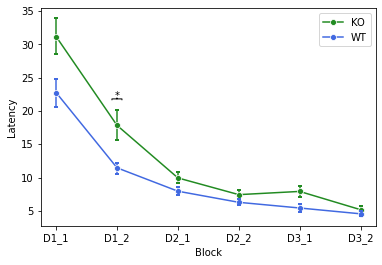

In [312]:
lat_fig2 = plt.figure()
lat_2 = plt.subplot()
sns.lineplot(x='Block', y='Latency', hue='Gene_type', data=hwk_class, estimator='mean', ci=68, style='Gene_type', palette=['forestgreen', 'royalblue'], markers=['o', 'o'], dashes=False, err_style = 'bars', err_kws={'capsize':2, 'capthick':2}, ax= lat_2)
lat_2.annotate('*', xy=(76, 125), xytext=(76, 125), xycoords='axes points', ha='center',
                va='bottom', arrowprops=dict(arrowstyle='-[, widthB=0.5, lengthB=.1', lw=1, color='k'))
lat_2.legend(labels=('KO', 'WT'))

In [313]:
lat_fig2.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/lat_fig_two_groups.png', dpi=600)

In [216]:
pg.normality(data=hwk_class, dv='Latency', group='Gene_type', method='normaltest')

,W,pval,normal
KO,598.631803,1.020365e-130,False
WT,660.566464,3.629233e-144,False


In [220]:
pg.mixed_anova(data=hwk_class, dv='Latency', within='Block', subject='ID', between='Gene_type')

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Gene_type,844.342424,1,44,844.342424,10.713486,2.074808e-03,NaN,0.195811,NaN,NaN,NaN,NaN
1,Block,16062.907432,5,220,3212.581486,102.480327,1.818408e-55,5.124984e-28,0.699618,0.493943,False,0.068802,5.894487e-18
2,Interaction,568.236416,5,220,113.647283,3.625312,3.587661e-03,NaN,0.076122,NaN,NaN,NaN,NaN


In [222]:
pg.pairwise_ttests(data=hwk_class, dv='Latency', between='Gene_type', within='Block', subject='ID', padjust='holm')


/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/parametric.py:197: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/effsize.py:689: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to "


,Contrast,Block,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Block,-,D1_1,D1_2,True,True,6.022067,229.000000,two-sided,6.795740e-09,4.757018e-08,holm,1.243e+06,0.536261
1,Block,-,D1_1,D2_1,True,True,9.922559,229.000000,two-sided,1.563886e-19,1.876663e-18,holm,2.926e+16,0.916051
2,Block,-,D1_1,D2_2,True,True,11.401870,229.000000,two-sided,3.813761e-24,5.064341e-23,holm,1.001e+21,1.033928
3,Block,-,D1_1,D3_1,True,True,11.409083,229.000000,two-sided,3.617386e-24,5.064341e-23,holm,1.054e+21,1.029510
4,Block,-,D1_1,D3_2,True,True,12.319950,246.263879,two-sided,1.719783e-27,2.579675e-26,holm,9.68e+26,1.145883
5,Block,-,D1_2,D2_1,True,True,4.821706,229.000000,two-sided,2.594787e-06,1.556872e-05,holm,4165.545,0.413081
6,Block,-,D1_2,D2_2,True,True,6.146365,229.000000,two-sided,3.485703e-09,2.788563e-08,holm,2.366e+06,0.576089
7,Block,-,D1_2,D3_1,True,True,6.477893,229.000000,two-sided,5.620824e-10,5.058741e-09,holm,1.38e+07,0.573474
8,Block,-,D1_2,D3_2,True,True,7.908737,266.222312,two-sided,6.969445e-14,7.666389e-13,holm,2.909e+11,0.735720
9,Block,-,D2_1,D2_2,True,True,3.674231,229.000000,two-sided,2.971053e-04,1.361971e-03,holm,48.093,0.297213


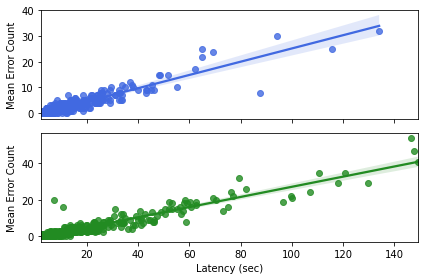

In [301]:
fx, axs = plt.subplots(ncols=1, nrows=2, sharex=True)
sns.regplot(data=hwk_class[hwk_class['Gene_type']=='WT'], x='Latency', y='Error_Count', ax=axs[0], color='royalblue')
sns.regplot(data=hwk_class[hwk_class['Gene_type']=='KO'], x='Latency', y='Error_Count', ax=axs[1], color='forestgreen')
axs[0].set_xlabel('')
axs[1].set_xlabel('Latency (sec)')
axs[0].set_ylabel('Mean Error Count')
axs[1].set_ylabel('Mean Error Count')
plt.tight_layout()

In [357]:
fx.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/err_lat_corr.png', dpi=600)

## Other versions of the figures

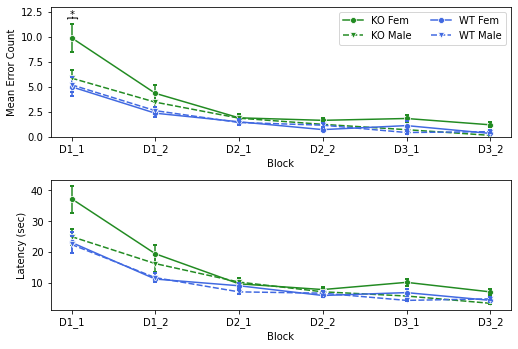

In [338]:
err_lat = plt.figure(figsize=(7.3, 5))
err_ax = plt.subplot(211)
sns.lineplot(x='Block', y='Error_Count', hue='Gene_type', data=hwk_class, estimator='mean', ci=68, style='Sex', palette=['forestgreen', 'royalblue'], markers=['o', 'v', 'o', 'v'], err_style = 'bars', err_kws={'capsize':2, 'capthick':2}, ax = err_ax)
err_ax.set_ylabel('Mean Error Count')
err_ax.legend(ncol=2, labels=['KO Fem', 'KO Male', 'WT Fem','WT Male'])
err_ax.set_ylim(0,13)
err_ax.annotate('*', xy=(22, 117), xytext=(22, 117), xycoords='axes points', ha='center',
                va='bottom', arrowprops=dict(arrowstyle='-[, widthB=0.5, lengthB=.1', lw=1, color='k'))
lat_ax= plt.subplot(212)
sns.lineplot(x='Block', y='Latency', hue='Gene_type', data=hwk_class, estimator='mean', ci=68, style='Sex', palette=['forestgreen', 'royalblue'], markers=['o', 'v', 'o', 'v'], err_style = 'bars', err_kws={'capsize':2, 'capthick':2}, ax = lat_ax, legend=False)
lat_ax.set_ylabel('Latency (sec)')
plt.tight_layout()

In [339]:
err_lat.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/err_lat_fig_all_groups.png', dpi=600)

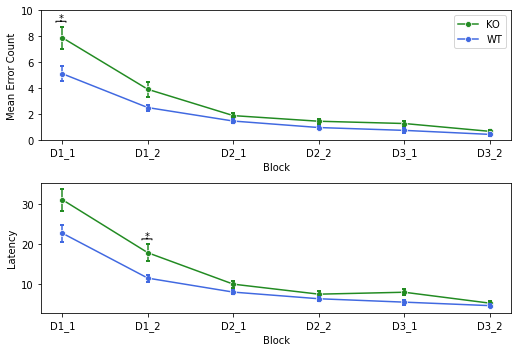

In [355]:
err_lat2 = plt.figure(figsize=(7.3, 5))
err_ax2 = plt.subplot(211)
sns.lineplot(x='Block', y='Error_Count', hue='Gene_type', data=hwk_class, estimator='mean', ci=68, palette=['forestgreen', 'royalblue'], style='Gene_type', dashes=False, markers=['o', 'o'], err_style = 'bars', err_kws={'capsize':2, 'capthick':2}, ax = err_ax2)
err_ax2.set_ylim(0, 10)
err_ax2.annotate('*', xy=(20, 117), xytext=(20, 117), xycoords='axes points', ha='center',
                va='bottom', arrowprops=dict(arrowstyle='-[, widthB=0.5, lengthB=.1', lw=1, color='k'))
err_ax2.legend(ncol=1, labels=['KO', 'WT'])
err_ax2.set_ylabel('Mean Error Count')
lat_2 = plt.subplot(212)
sns.lineplot(x='Block', y='Latency', hue='Gene_type', data=hwk_class, estimator='mean', ci=68, style='Gene_type', palette=['forestgreen', 'royalblue'], markers=['o', 'o'], dashes=False, err_style = 'bars', err_kws={'capsize':2, 'capthick':2}, ax= lat_2, legend=False)
lat_2.annotate('*', xy=(106, 72), xytext=(106, 72), xycoords='axes points', ha='center',
                va='bottom', arrowprops=dict(arrowstyle='-[, widthB=0.5, lengthB=.1', lw=1, color='k'))
plt.tight_layout()


In [356]:
err_lat2.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/err_lat_fig_two_groups.png', dpi=600)